In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Explore fitnesses across generations

In [2]:
df_fitness = pd.read_csv("results/best_fitnesses.csv", header=None)
# drop last column of NaNs
df_fitness = df_fitness.drop(df_fitness.columns[len(df_fitness.columns)-1], axis=1)
# Add column names
columns = ["parallel_strategy"]
columns.extend(["gen_" + str(i) for i in range(0, 50)])
df_fitness.columns = columns


df_fitness.head()

,parallel_strategy,gen_0,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,...,gen_40,gen_41,gen_42,gen_43,gen_44,gen_45,gen_46,gen_47,gen_48,gen_49
0,sequential,4.466790e-07,4.554470e-07,4.646530e-07,4.766690e-07,4.870730e-07,5.005540e-07,5.025920e-07,5.105830e-07,5.208340e-07,...,7.154610e-07,7.183460e-07,7.147610e-07,7.234440e-07,7.299930e-07,7.282140e-07,7.296640e-07,7.329770e-07,7.399590e-07,7.441450e-07
1,sequential,4.466790e-07,4.554470e-07,4.646530e-07,4.766690e-07,4.870730e-07,5.005540e-07,5.025920e-07,5.105830e-07,5.208340e-07,...,7.154610e-07,7.183460e-07,7.147610e-07,7.234440e-07,7.299930e-07,7.282140e-07,7.296640e-07,7.329770e-07,7.399590e-07,7.441450e-07
2,threads1,4.466790e-07,4.554470e-07,4.646530e-07,4.766690e-07,4.870730e-07,5.005540e-07,5.025920e-07,5.105830e-07,5.208340e-07,...,7.154610e-07,7.183460e-07,7.147610e-07,7.234440e-07,7.299930e-07,7.282140e-07,7.296640e-07,7.329770e-07,7.399590e-07,7.441450e-07
3,fastflow1,4.466790e-07,4.554470e-07,4.646530e-07,4.766690e-07,4.870730e-07,5.005540e-07,5.025920e-07,5.105830e-07,5.208340e-07,...,7.154610e-07,7.183460e-07,7.147610e-07,7.234440e-07,7.299930e-07,7.282140e-07,7.296640e-07,7.329770e-07,7.399590e-07,7.441450e-07
4,threads2,4.477150e-07,4.564920e-07,4.649590e-07,4.769560e-07,4.867860e-07,4.979230e-07,5.105940e-07,5.193730e-07,5.277820e-07,...,7.886780e-07,7.982010e-07,7.991250e-07,8.161120e-07,8.344390e-07,8.313980e-07,8.540920e-07,8.611710e-07,8.689690e-07,8.802110e-07


Plot of fitness across generation for Sequential strategy.

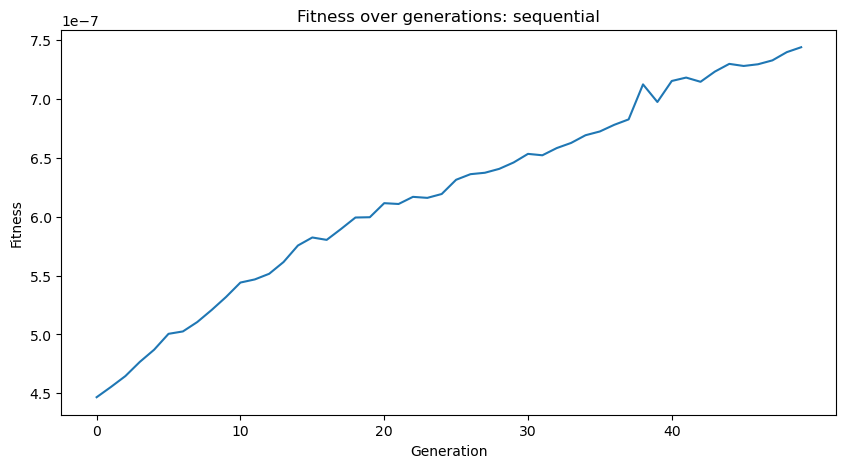

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(df_fitness.iloc[0, 1:])
plt.title('Fitness over generations: ' + df_fitness.iloc[0, 0])
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xticks(ticks=np.arange(0, 50, 10), labels=np.arange(0, 50, 10))
plt.show()


Plot of fitness across generation for Threads (32 workers) strategy.

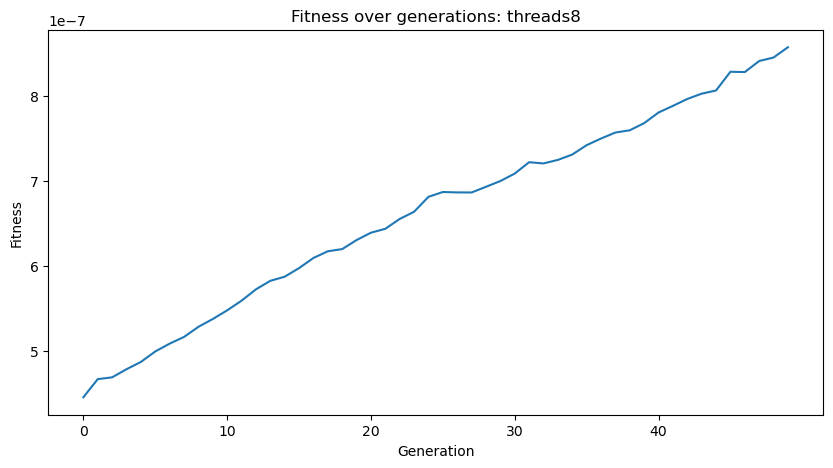

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df_fitness.iloc[10, 1:])
plt.title('Fitness over generations: ' + df_fitness.iloc[10, 0])
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xticks(ticks=np.arange(0, 50, 10), labels=np.arange(0, 50, 10))
plt.show()

Plot of fitness across generation for Fastflow (32 workers) strategy.

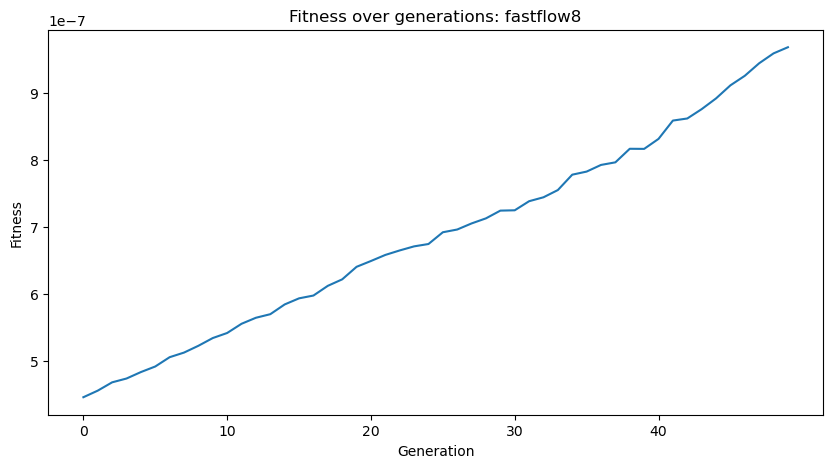

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df_fitness.iloc[11, 1:])
plt.title('Fitness over generations: ' + df_fitness.iloc[11, 0])
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xticks(ticks=np.arange(0, 50, 10), labels=np.arange(0, 50, 10))
plt.show()

# Sequential and parallelizable parts of the program

In [6]:
df_sequential = pd.read_csv('results/sequential_results.csv')
df_sequential.head()

,maxFitness,totalTime,distanceTime,initializationTimeRandom,initializationTimeEmpty,evolutionTime,crossoverTime,mutationTime,fitnessTime
0,1.401300e-45,65846597,7086,35824,1569,65774051,16428865,99,751177
1,1.401300e-45,64218652,7641,43569,1751,64139214,0,0,0


In [7]:
# Calulate the column "otherTime" in the dataframe (totalTime - distanceTime - initializationTimeRandom - initializationTimeEmpty - evolutionTime)
df_sequential['otherTime'] = df_sequential['totalTime'] - df_sequential['distanceTime'] - df_sequential['initializationTimeRandom'] - df_sequential['initializationTimeEmpty'] - df_sequential['evolutionTime']

Pieplot over the times

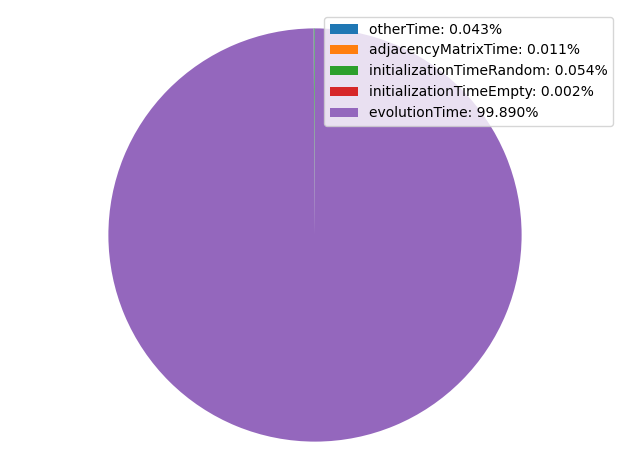

In [8]:
sizes = df_sequential[['otherTime', 'distanceTime', 'initializationTimeRandom', 'initializationTimeEmpty', 'evolutionTime']].iloc[0].values
# Normalize sizes in 0-100
sizes = sizes / sizes.sum() * 100
labels=['otherTime', 'adjacencyMatrixTime', 'initializationTimeRandom', 'initializationTimeEmpty', 'evolutionTime']

plt.pie(sizes, startangle=90)
handles, _ = plt.gca().get_legend_handles_labels()
legend_labels = [f'{label}: {size:.3f}%' for label, size in zip(labels, sizes)]
plt.legend(legend_labels, loc='best')

plt.axis('equal')
plt.tight_layout()
plt.show()

Exclude evolutionTime

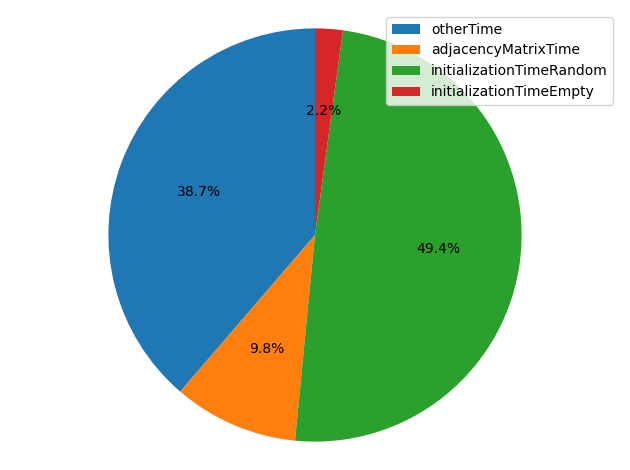

In [9]:
sizes = df_sequential[['otherTime', 'distanceTime', 'initializationTimeRandom', 'initializationTimeEmpty']].iloc[0].values

plt.pie(sizes, autopct='%1.1f%%', startangle=90)
plt.legend(labels=['otherTime', 'adjacencyMatrixTime', 'initializationTimeRandom', 'initializationTimeEmpty'], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

Internal times in evolutionTime

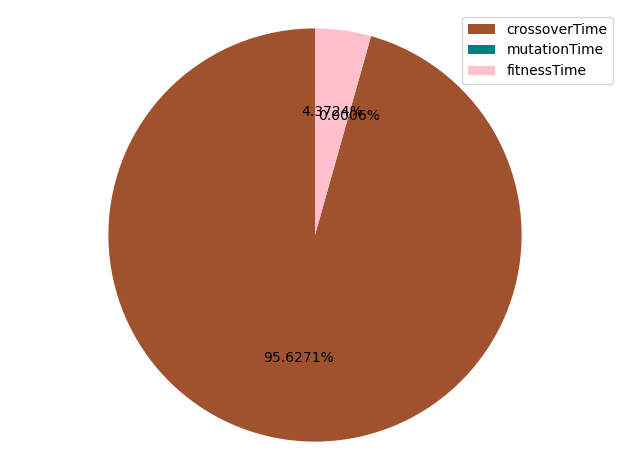

In [10]:
sizes = df_sequential[['crossoverTime', 'mutationTime', 'fitnessTime']].iloc[0].values

plt.pie(sizes, autopct='%1.4f%%', startangle=90, colors=['sienna', 'teal', 'pink'])
plt.legend(labels=['crossoverTime', 'mutationTime', 'fitnessTime'], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

# Parallelization total time analysis

In [11]:
df_threads = pd.read_csv('results/threads_results.csv')
df_threads.head()

,numWorkers,maxFitness,totalTime,distanceTime,initializationTimeRandom,initializationTimeEmpty,evolutionTime,crossoverTime,mutationTime,fitnessTime
0,1,7.465900e-07,62845180,8336,39700,2311,62768194,0,0,0
1,2,8.941580e-07,34307369,4125,74086,1442,34199603,0,0,0
2,4,9.757100e-07,20596030,2457,113311,1009,20449471,0,0,0
3,6,1.007780e-06,17992504,2120,162357,891,17794036,0,0,0
4,8,8.692230e-07,15301681,1788,167104,1312,15095313,0,0,0


In [12]:
df_ff = pd.read_csv('results/ff_results.csv')
df_ff.head()

,numWorkers,maxFitness,totalTime,distanceTime,initializationTimeRandom,initializationTimeEmpty,evolutionTime,crossoverTime,mutationTime,fitnessTime
0,1,0.000000e+00,61809553,7923,59514,1564,61698324,0,0,0
1,2,3.096590e-41,34345319,6409,59772,1210,34217810,0,0,0
2,4,-4.985650e-22,26228783,2425,124137,1072,26051872,0,0,0
3,6,-4.985650e-22,22541730,2551,168897,714,22317684,0,0,0
4,8,-4.985650e-22,19651835,1517,192689,580,19401673,0,0,0


In [13]:
num_workers_list = df_threads['numWorkers'].values

In [14]:
total_times_threads = df_threads['totalTime'].iloc[0:17]
total_times_ff = df_ff['totalTime'].iloc[0:17]

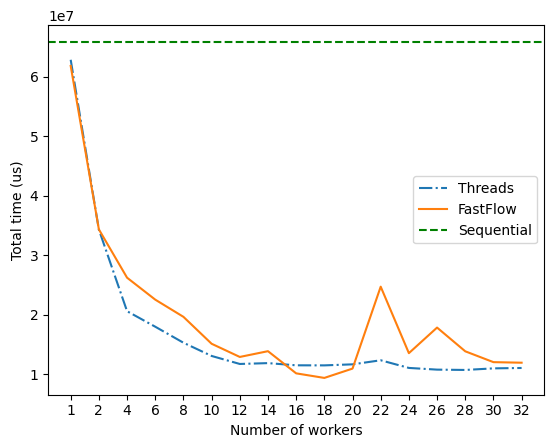

In [15]:
plt.plot(total_times_threads, label='Threads', linestyle='dashdot')
plt.plot(total_times_ff, label='FastFlow')
plt.axhline(y=df_sequential['totalTime'].iloc[0], color='green', label='Sequential', linestyle='dashed')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Total time (us)')
plt.xticks(ticks=[i for i in range(len(num_workers_list))], labels=num_workers_list)

plt.show()

### Speedup

In [16]:
df_threads['speedup'] = df_sequential['totalTime'].iloc[0] / df_threads['totalTime']
df_ff['speedup'] = df_sequential['totalTime'].iloc[0] / df_ff['totalTime']

In [17]:
print(df_threads[['numWorkers','speedup']])
print(df_ff[['numWorkers','speedup']])


    numWorkers   speedup
0            1  1.047759
1            2  1.919314
2            4  3.197053
3            6  3.659668
4            8  4.303226
5           10  5.034677
6           12  5.612510
7           14  5.544808
8           16  5.722306
9           18  5.728086
10          20  5.642897
11          22  5.330444
12          24  5.950130
13          26  6.107872
14          28  6.139059
15          30  5.989875
16          32  5.953944
    numWorkers   speedup
0            1  1.065314
1            2  1.917193
2            4  2.510471
3            6  2.921098
4            8  3.350659
5           10  4.352464
6           12  5.099776
7           14  4.743580
8           16  6.483325
9           18  7.014464
10          20  6.010941
11          22  2.663676
12          24  4.859811
13          26  3.689498
14          28  4.750751
15          30  5.469560
16          32  5.512868


In [18]:
ideal_times = [df_sequential['totalTime'].iloc[0]/i for i in num_workers_list]
ideal_speedup = [i for i in num_workers_list]
print(ideal_speedup)

[1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]


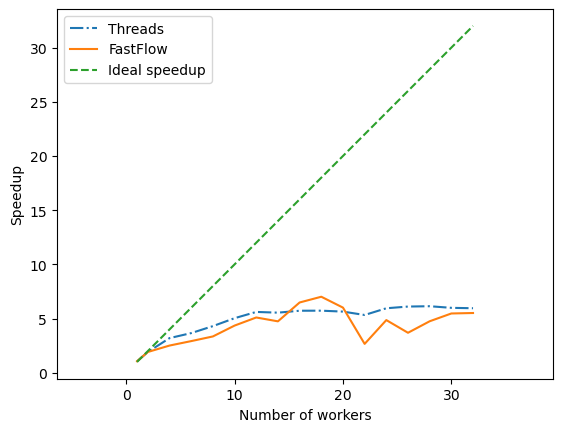

In [19]:
plt.plot(num_workers_list, df_threads['speedup'].iloc[0:17], label='Threads', linestyle='dashdot')
plt.plot(num_workers_list, df_ff['speedup'].iloc[0:17], label='FastFlow')
plt.plot(num_workers_list, ideal_speedup, linestyle='dashed', label='Ideal speedup')
plt.legend()
plt.xlabel('Number of workers')
plt.ylabel('Speedup')
plt.axis('equal')

# set plot size
plt.rcParams["figure.figsize"] = (8, 8)

plt.show()